# My Dream Country

### The aim of the study and data collection

The following dataset was collected as a part of a larger research that deals with the prediction of well-being factors in Slovenia, compiled with the objective of ranking 32 European countries. Specifically, the study aimed to determine participants preferences for residing in different countries, thereby finding the relative popularity of Slovenia among Slovenians and factors affecting this preferences. 

Initially, this analysis employed pairwise comparison technique, wherein each country was evaluated against every other country in paired fashion, and respondents were required to indicate their preference for living in each one. In doing so, the ranking score for each country was calculated by taking into account how many times it was chosen in pairwise comparison and how frequently it appeared to participants for comparison. Furthermore, demographic information, the total points earned on the final high school exam (which impacts university admission), and levels of agreement about macroeconomic statements were also gathered from the respondents. 

As a result, the present study aims to determine if specific factors, such as exam grades or agreement with certain statements, are correlated with country preferences. Furthermore, this study seeks to investigate potential interaction effects between these various factors and country preferences.

### Dataset 1 description

The present dataset was collected in the January, as part of courses at the Faculty of Economics in Ljubljana. 

* **Age**: the number of years;
* **Region**: the region of living;
* **Grades**: success on the final high school exam measured as the sum of scores;
* **Responsibility**: statement *'Individuals should take more responsibility for their lives.'*;
* **Employment**: statement *'The unemployed should take any available job or lose unemployment benefits.'*;
* **Competition**: statement *'Market competition improves the country and the living environment.'*;
* **Gini**: statement *'Employees incomes should be more equal.'*
* **Privatization**: statement *'Private ownership of bussiness and industry should be increased.'*

Note that data regarding the gender and education of the participants is not available. Data on gender was ommited from the research unintentionally, while data education was excluded from the beggining, because the sample exclusively comprises university students who were assumed to have completed secondary education.


In [1]:
suppressMessages(library(readr))
suppressMessages(library(dplyr))
suppressMessages(library(tidyverse))
suppressMessages(library(skimr))

In [2]:
data_all <- read.csv('data_all.csv', header = TRUE)
data_all <- data_all[, -c(3,4)]
head(data_all)

,id_i,timestamp,age,region,grades,responsibility,employment,competition,gini,privatization,slovenia_an_option,slovenia_selected,slov_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,000f1445-945e-48da-9a6f-0cac103ca7a3,2023-01-12T08:16:21.233Z,0-25,osrednjeslovenska,spomin,10,4,7,5,6,4,3,0.7500000
2,002bc375-035c-4694-84d2-9c51746d8aa6,2023-01-10T13:04:10.750Z,0-25,osrednjeslovenska,e,10,7,5,5,6,2,2,1.0000000
3,02d7448d-9dd2-4115-a512-d4f1a9761aa7,2023-01-11T09:11:57.043Z,0-25,osrednjeslovenska,c,9,9,7,5,9,1,1,1.0000000
4,037498ef-663e-44c2-b628-bfd2eeb06861,2023-01-12T08:14:54.803Z,0-25,podravska,b,9,8,9,7,6,2,2,1.0000000
5,04346d1e-81a7-43dc-9eb6-b745436aad8f,2023-01-10T13:05:29.078Z,0-25,goriska,e,9,10,7,7,7,3,2,0.6666667
6,0450f190-731d-4c44-86b4-324fe1d93da2,2023-01-10T13:05:39.833Z,0-25,osrednjeslovenska,spomin,8,10,6,4,7,2,2,1.0000000


In [3]:
summary(data_all)
skim(data_all)

     id_i            timestamp             age               region         
 Length:236         Length:236         Length:236         Length:236        
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
    grades          responsibility     employment      competition    
 Length:236         Min.   : 1.000   Min.   : 1.000   Min.   : 1.000  
 Class :character   1st Qu.: 8.000   1st Qu.: 5.750   1st Qu.: 7.000  
 Mode  :character   Median : 8.000   Median : 8.000   Median : 8.000  
                    Mean   : 8.335   Mean   : 7.284   Mean   : 7.555  
                    3rd Qu.:10.000   3rd Qu.: 9.000   3rd Qu.: 9.000  
                    Max.   :10.000 

── Data Summary ────────────────────────
                           Values  
Name                       data_all
Number of rows             236     
Number of columns          13      
_______________________            
Column type frequency:             
  character                5       
  numeric                  8       
________________________           
Group variables            None    

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 id_i                  0             1  36  36     0      236          0
2 timestamp             0             1  24  24     0      236          0
3 age                   0             1   4   5     0        3          0
4 region                0             1   7  20     0       12          0
5 grades                0             1   1   6     0        7          0

── Variable type: numeric ──────────────────────────────────────────────

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
"'length(x) = 17 > 1' in coercion to 'logical(1)'"


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,character,id_i,0,1,36,36,0,236,0,NA,NA,NA,NA,NA,NA,NA,NA
2,character,timestamp,0,1,24,24,0,236,0,NA,NA,NA,NA,NA,NA,NA,NA
3,character,age,0,1,4,5,0,3,0,NA,NA,NA,NA,NA,NA,NA,NA
4,character,region,0,1,7,20,0,12,0,NA,NA,NA,NA,NA,NA,NA,NA
5,character,grades,0,1,1,6,0,7,0,NA,NA,NA,NA,NA,NA,NA,NA
6,numeric,responsibility,0,1,NA,NA,NA,NA,NA,8.3347458,1.5278341,1,8.0000000,8,10,10,▁▁▁▇▇
7,numeric,employment,0,1,NA,NA,NA,NA,NA,7.2838983,2.4494713,1,5.7500000,8,9,10,▁▂▃▆▇
8,numeric,competition,0,1,NA,NA,NA,NA,NA,7.5550847,1.8384590,1,7.0000000,8,9,10,▁▁▃▇▅
9,numeric,gini,0,1,NA,NA,NA,NA,NA,5.3559322,2.4513146,1,3.0000000,5,7,10,▃▆▇▆▃


In [4]:
# again check for missing values
sum(is.na(data_all))

[1] 0

The sample size equals 236, with no missing values. After reviewing the dataset summary, it appears that the variables age, region, and grades are represented as character values, and can be categorized as nominal variables. 
Furthermore, we can observe that age, region and grades occupy 3, 12 and 7 distinct values within the dataset, respectively.

Conversely, the remaining variables which consist of different statements on macroeconomics, are assessed on a 10-point Likert scale, with each point indicating a distinct level of agreement or disagreement, thereby classifying them as ordinal variables. Based on the mean responses to the statements, it appears that the participants' highest level of agreement was with the responsibility statement, while the gini statement had the lowest level of agreement. Additionally, in the quirtile output we observe that in the majority of the statement variables, at least 50% of the responses range above 8 points on a scale of 10, which implies a non-parametric distribution. Although the gini statement shows values evenly distributed across quartiles, suggesting a normal distribution, this assumption requires further examination.

But before that, let's take a look at the frequency analysis of the nominal variables.


### Nominal Variables


 0-25 26-35 36-45 
  228     5     3 


 0-25 26-35 36-45 
0.966 0.021 0.013 

Loading required package: viridisLite



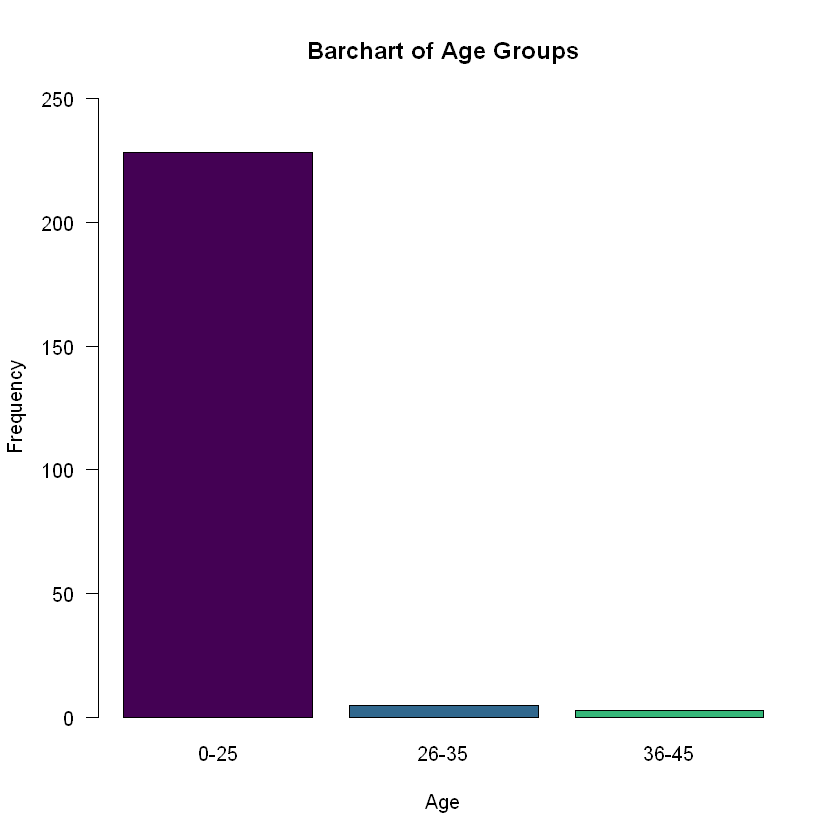

In [5]:
# age groups > 97% of the data represented by one group 
table(data_all$age)
round(prop.table(table(data_all$age)), digits = 3)

library('viridis')
barplot(height = table(data_all$age), main = 'Barchart of Age Groups',
        ylab = "Frequency", xlab = 'Age',
        col = viridis(4), 
        width = 0.5, ylim = c(0, 250), las = 1)


As anticipated, almost all of the particiapnts (97 %) fall under or equal the age of 25, while the remaining three percent are between 26 and 45 years old.

In [6]:
# recoding to nicely looking names
data_all <- mutate(data_all, region = recode(region, 
                "gorenjska" = "Gorenjska",
                "goriska" = "Goriška",   
                "jv_slovenija" = "Jugovzhodna Slovenija",
                "koroska" = "Koroška",
                "obalno_kraska" = "Obalno-kraška",
                "osrednjeslovenska" = "Osrednjeslovenska",
                "podravska" = "Podravska",
                "pomurska" = "Pomurska",
                "posavska" = "Posavska",
                "primorsko_notranjska" = "Primorsko-notranjska",
                "savinjska" = "Savinjska",
                "zasavska" = "Zasavska"))
head(data_all)

,id_i,timestamp,age,region,grades,responsibility,employment,competition,gini,privatization,slovenia_an_option,slovenia_selected,slov_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,000f1445-945e-48da-9a6f-0cac103ca7a3,2023-01-12T08:16:21.233Z,0-25,Osrednjeslovenska,spomin,10,4,7,5,6,4,3,0.7500000
2,002bc375-035c-4694-84d2-9c51746d8aa6,2023-01-10T13:04:10.750Z,0-25,Osrednjeslovenska,e,10,7,5,5,6,2,2,1.0000000
3,02d7448d-9dd2-4115-a512-d4f1a9761aa7,2023-01-11T09:11:57.043Z,0-25,Osrednjeslovenska,c,9,9,7,5,9,1,1,1.0000000
4,037498ef-663e-44c2-b628-bfd2eeb06861,2023-01-12T08:14:54.803Z,0-25,Podravska,b,9,8,9,7,6,2,2,1.0000000
5,04346d1e-81a7-43dc-9eb6-b745436aad8f,2023-01-10T13:05:29.078Z,0-25,Goriška,e,9,10,7,7,7,3,2,0.6666667
6,0450f190-731d-4c44-86b4-324fe1d93da2,2023-01-10T13:05:39.833Z,0-25,Osrednjeslovenska,spomin,8,10,6,4,7,2,2,1.0000000



            Gorenjska               Goriška Jugovzhodna Slovenija 
                   40                    14                    12 
              Koroška         Obalno-kraška     Osrednjeslovenska 
                    5                    23                    98 
            Podravska              Pomurska              Posavska 
                   12                     8                     2 
 Primorsko-notranjska             Savinjska              Zasavska 
                    4                    13                     5 


            Gorenjska               Goriška Jugovzhodna Slovenija 
                0.169                 0.059                 0.051 
              Koroška         Obalno-kraška     Osrednjeslovenska 
                0.021                 0.097                 0.415 
            Podravska              Pomurska              Posavska 
                0.051                 0.034                 0.008 
 Primorsko-notranjska             Savinjska              Zasavska 
                0.017                 0.055                 0.021 

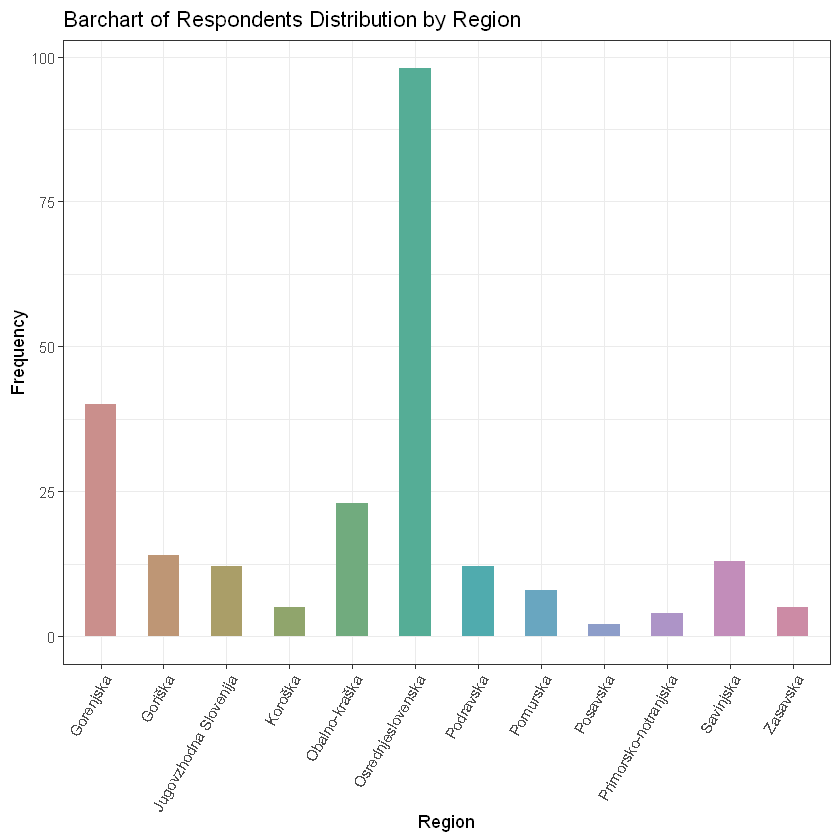

In [7]:
# region
table(data_all$region)
round(prop.table(table(data_all$region)), digits = 3)

ggplot(data_all, aes(x = region, fill = region)) +
  geom_bar(width = 0.5) +  scale_fill_hue(c = 40) +
  ggtitle('Barchart of Respondents Distribution by Region') +  xlab('Region') +   ylab('Frequency') +
  theme_bw() +  theme(axis.text.x = element_text(angle = 60, hjust = 1), legend.position="none")


Next, the bar graph shows that the largest share of participants reside in the Osrednjeslovenska region (42 %), followed by Gorenjska and Obalno-Kraška, with 17 % and 10 %, respectively. The smallest percentage, which is slightly below one precent of students comes from Posavska region. 

In [8]:
# grades 
unique(data_all$grades)


# renaming grades to initial values and translated in English
data_all <- mutate(data_all, grades = recode(grades, 
                'nula' = 'I did not take an exam',
                'spomin' = 'I do not remember',   
                'a' = 'up to 15',
                'b' = 'from 16 to 20',
                'c' = 'from 21 to 25',
                'd' = 'from 26 to 30',
                'e' = '31 or more'))
head(data_all)

[1] "spomin" "e"      "c"      "b"      "a"      "nula"   "d"

,id_i,timestamp,age,region,grades,responsibility,employment,competition,gini,privatization,slovenia_an_option,slovenia_selected,slov_score
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,000f1445-945e-48da-9a6f-0cac103ca7a3,2023-01-12T08:16:21.233Z,0-25,Osrednjeslovenska,I do not remember,10,4,7,5,6,4,3,0.7500000
2,002bc375-035c-4694-84d2-9c51746d8aa6,2023-01-10T13:04:10.750Z,0-25,Osrednjeslovenska,31 or more,10,7,5,5,6,2,2,1.0000000
3,02d7448d-9dd2-4115-a512-d4f1a9761aa7,2023-01-11T09:11:57.043Z,0-25,Osrednjeslovenska,from 21 to 25,9,9,7,5,9,1,1,1.0000000
4,037498ef-663e-44c2-b628-bfd2eeb06861,2023-01-12T08:14:54.803Z,0-25,Podravska,from 16 to 20,9,8,9,7,6,2,2,1.0000000
5,04346d1e-81a7-43dc-9eb6-b745436aad8f,2023-01-10T13:05:29.078Z,0-25,Goriška,31 or more,9,10,7,7,7,3,2,0.6666667
6,0450f190-731d-4c44-86b4-324fe1d93da2,2023-01-10T13:05:39.833Z,0-25,Osrednjeslovenska,I do not remember,8,10,6,4,7,2,2,1.0000000


In [9]:
table(data_all$grades)
round(prop.table(table(data_all$grades)), digits = 3)


            31 or more          from 16 to 20          from 21 to 25 
                    16                     53                     81 
         from 26 to 30 I did not take an exam      I do not remember 
                    34                      2                     41 
              up to 15 
                     9 


            31 or more          from 16 to 20          from 21 to 25 
                 0.068                  0.225                  0.343 
         from 26 to 30 I did not take an exam      I do not remember 
                 0.144                  0.008                  0.174 
              up to 15 
                 0.038 

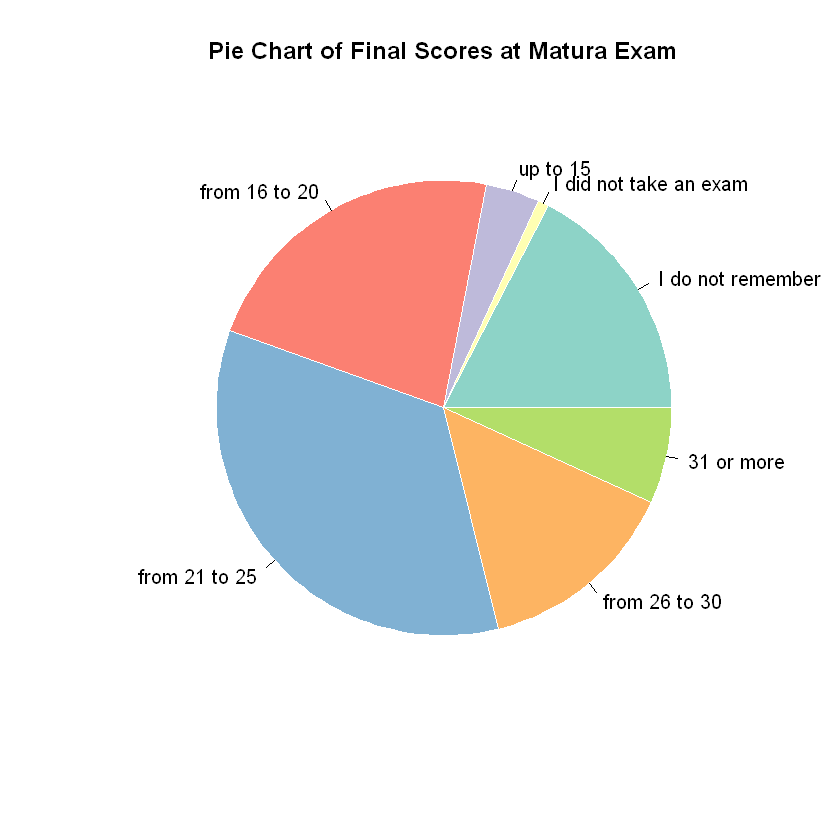

In [10]:
grades_ordered <- factor(data_all$grades, levels = c("I do not remember", "I did not take an exam", "up to 15", "from 16 to 20", "from 21 to 25", "from 26 to 30", "31 or more"),
                        ordered = TRUE)
slices <- table(grades_ordered)

library(RColorBrewer)
myPalette <- brewer.pal(7, "Set3")
pie(slices, labels = names(slices), main="Pie Chart of Final Scores at Matura Exam", 
    col = myPalette, border = "white") 

Upon examining the data for the groups representing the number of points scored by students on their high school final exam, it becomes apparent that slightly less than one-third (34%) of students scored between 21 and 25 points, representing also the largest share of students. The second-highest group with 22% comprised of students scoring between 16 and 20 points, followed by the group scoring between 26 and 30 points with 14 %. The number of students who achieved a score hihger than 31 points on the exam is 7 % in total.

In [11]:
# treat ordinal var as numeric var
# higher number will indicate a higher success on exam
#recoding_rules <- c("nisem opravljal mature" = NA,
#                   "se ne spomnim" = 1,
#                   "do 15" = 2,
#                   "od 16 do 20" = 3,
#                   "od 21 do 25" = 4,
#                   "od 26 do 30" = 5,
#                   "31 ali več" = 6)

# loop over the grades column and recode each value
#for (i in 1:length(data$grades)) {
#  
#  current_grade <- data$grades[i]
#  recoded_grade <- recoding_rules[current_grade]
#    data$grades[i] <- recoded_grade
#}

#data$grades <- as.numeric(data$grades)
#head(data)

### Distributions of Ordinal Variables

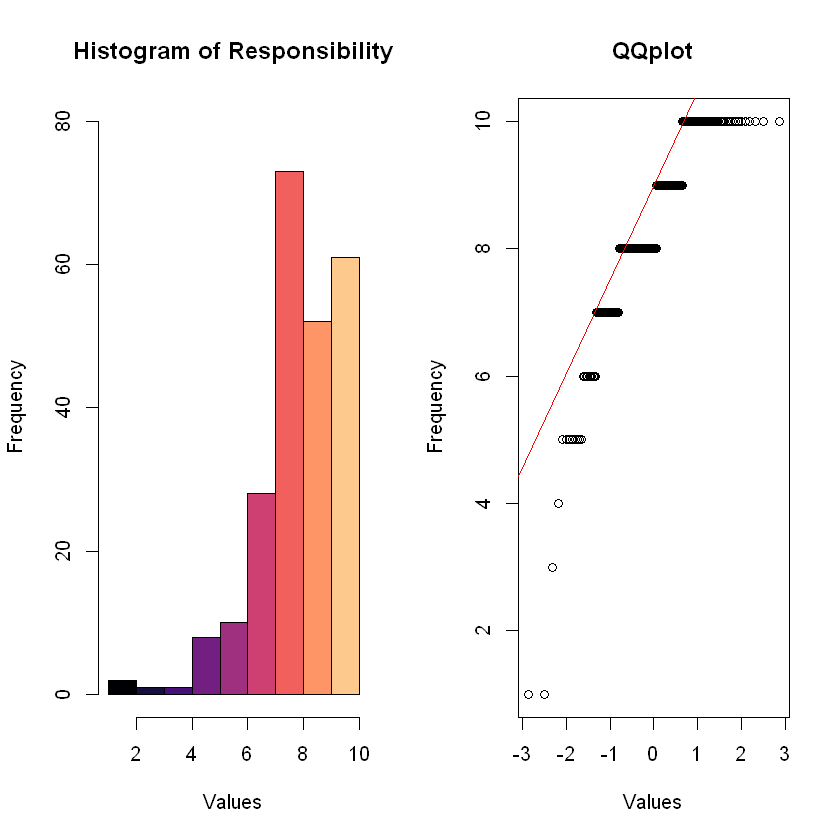

In [51]:
# check for distribution of each statement with hist and qq-plot
library(viridis)
par(mfrow = c(1,2))
hist(data_all$responsibility, breaks = 'Scott', main = "Histogram of Responsibility",
     xlab = "Values", ylab = "Frequency", col = magma(10), ylim = c(0, 80))
qqnorm(data_all$responsibility, main = "QQplot", xlab = "Values", ylab = "Frequency")
qqline(data_all$responsibility, col = "red")


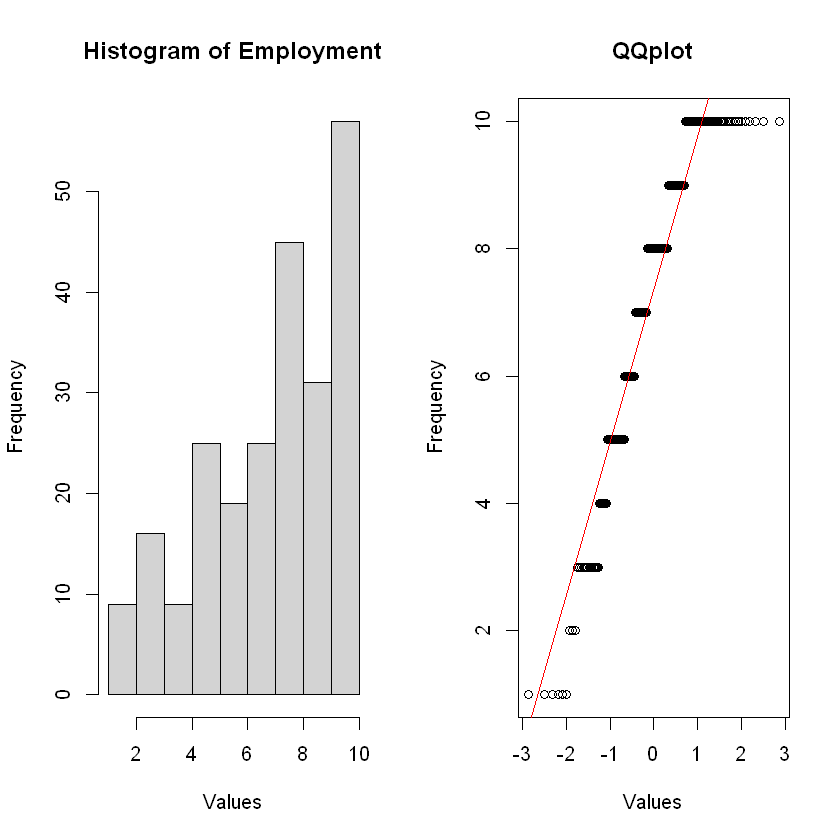

In [13]:
par(mfrow = c(1,2))
hist(data_all$employment, breaks = 'Freedman-Diaconis', main = "Histogram of Employment",
     xlab = "Values", ylab = "Frequency")
qqnorm(data_all$employment, main = "QQplot", xlab = "Values", ylab = "Frequency")
qqline(data_all$employment, col = "red")


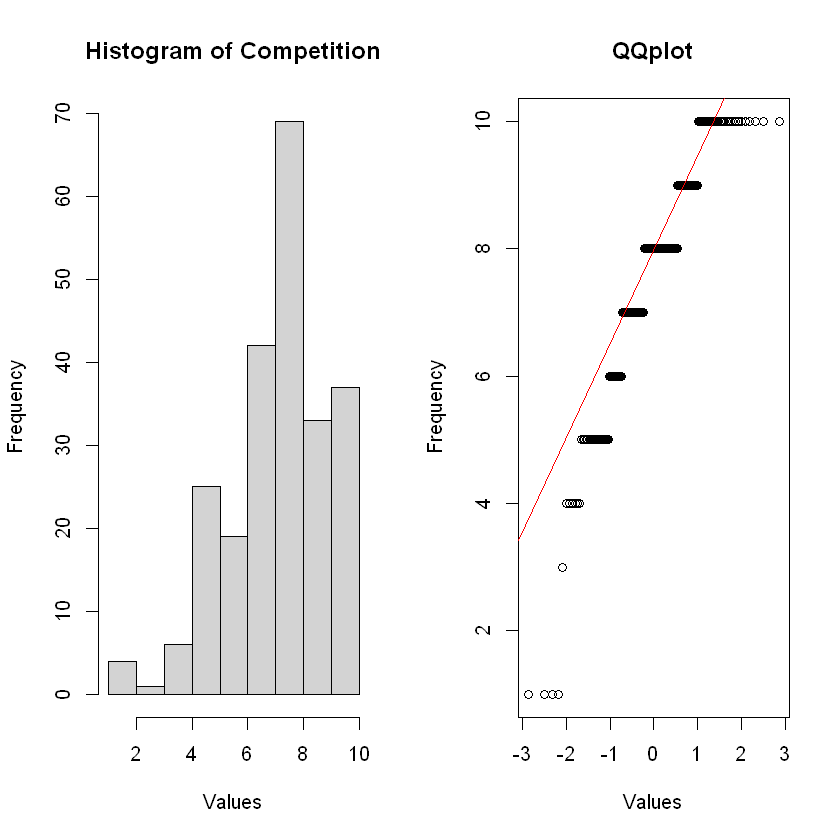

In [14]:
par(mfrow = c(1,2))
hist(data_all$competition, breaks = 'Scott', main = "Histogram of Competition",
     xlab = "Values", ylab = "Frequency")
qqnorm(data_all$competition, main = "QQplot", xlab = "Values", ylab = "Frequency")
qqline(data_all$competition, col = "red")


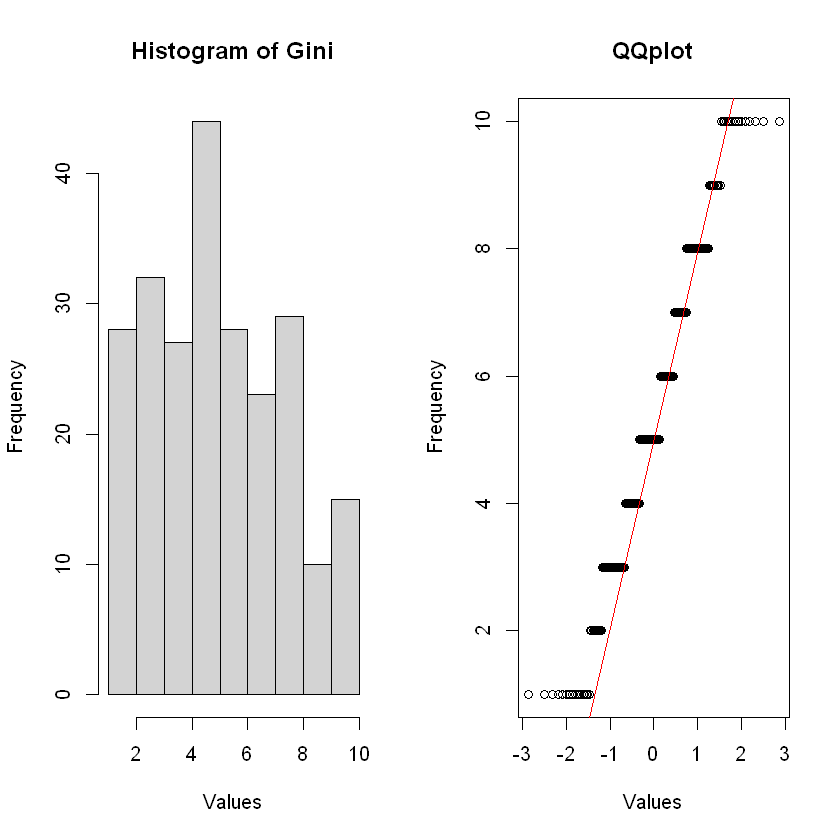

In [15]:
par(mfrow = c(1,2))
hist(data_all$gini, breaks = 'Freedman-Diaconis', main = "Histogram of Gini",
     xlab = "Values", ylab = "Frequency")
qqnorm(data_all$gini, main = "QQplot", xlab = "Values", ylab = "Frequency")
qqline(data_all$gini, col = "red")

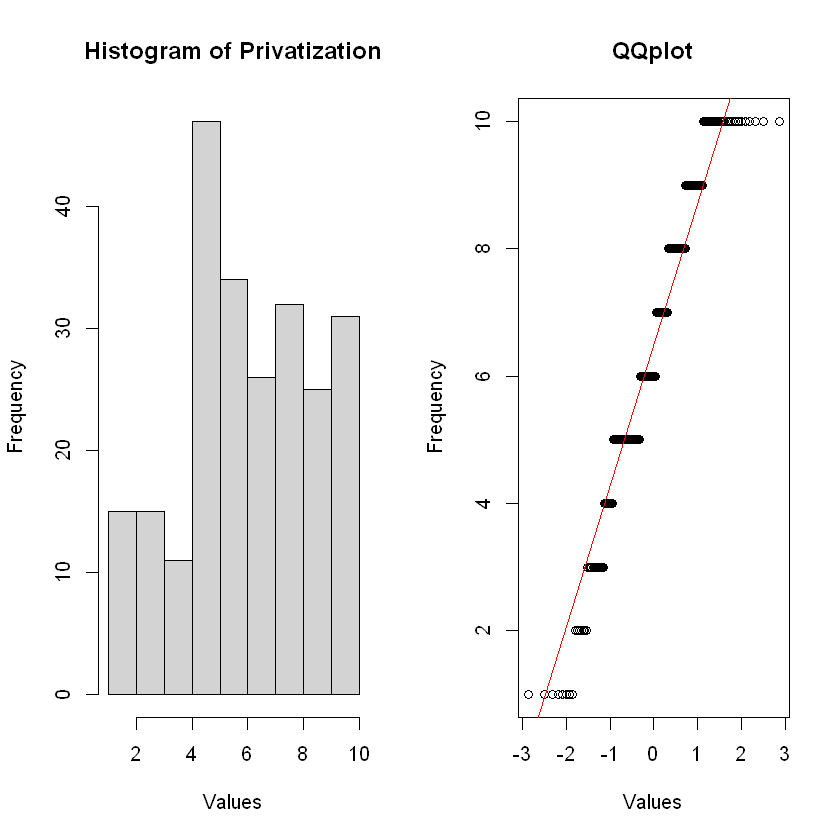

In [16]:
par(mfrow = c(1,2))
hist(data_all$privatization, breaks = 'Freedman-Diaconis', main = "Histogram of Privatization",
     xlab = "Values", ylab = "Frequency", col = "")
qqnorm(data_all$privatization, main = "QQplot", xlab = "Values", ylab = "Frequency")
qqline(data_all$privatization, col = "red")

The histograms for responsibility, employment, and competition exhibit a significant left-skewed distribution with a prominent peak around the value of 8. Based on the first three additional Q-Q plots, it is evident that the data points deviate from the normal distribution line. Therefore, we can deduce that the distribution of the data is not normal. Moreover, the remaining two distributions, namely gini and competition, suggest a slightly negative kurtosis and deviation from a symmetrical distribution. Upon examining the Q-Q plots for both distributions, we observe that the majority of data points align with the normal distribution line, yet it remains unclear if the distribution is non-normal. To address this uncertainty, we will conduct additional tests such as the Shapiro-Wilk and Anderson tests.

In [17]:
# Shapiro-Wilk normality test
library(nortest)

data_numeric <- data_all[c('responsibility', 'employment', 'competition', 'gini', 'privatization')]

sw_test_results <- data.frame(variable = character(), p_value = numeric(), stringsAsFactors = FALSE)

options(scipen = 999)

for (col in colnames(data_numeric)) {
  test <- shapiro.test(data_numeric[[col]])
  p_value_rounded <- round(test$p.value, 3)
  sw_test_results <- rbind(sw_test_results, data.frame(variable = col, p_value = p_value_rounded, stringsAsFactors = FALSE))
}


print(sw_test_results)

        variable p_value
1 responsibility       0
2     employment       0
3    competition       0
4           gini       0
5  privatization       0


The null hypothesis of the Shapiro-Wilk test suggests that the population from which a sample is drawn has a normal distribution. Given that the p-value in all of the statement variables is less than the level of significance (p < .05), we reject the nully hypothesis and conclude that the sample in all cases comes from a non-normal distribution / denoting the rejection of the null hypothesis at  a 0.1\% level, signifying that the data is not normally distributed.

corrplot 0.92 loaded



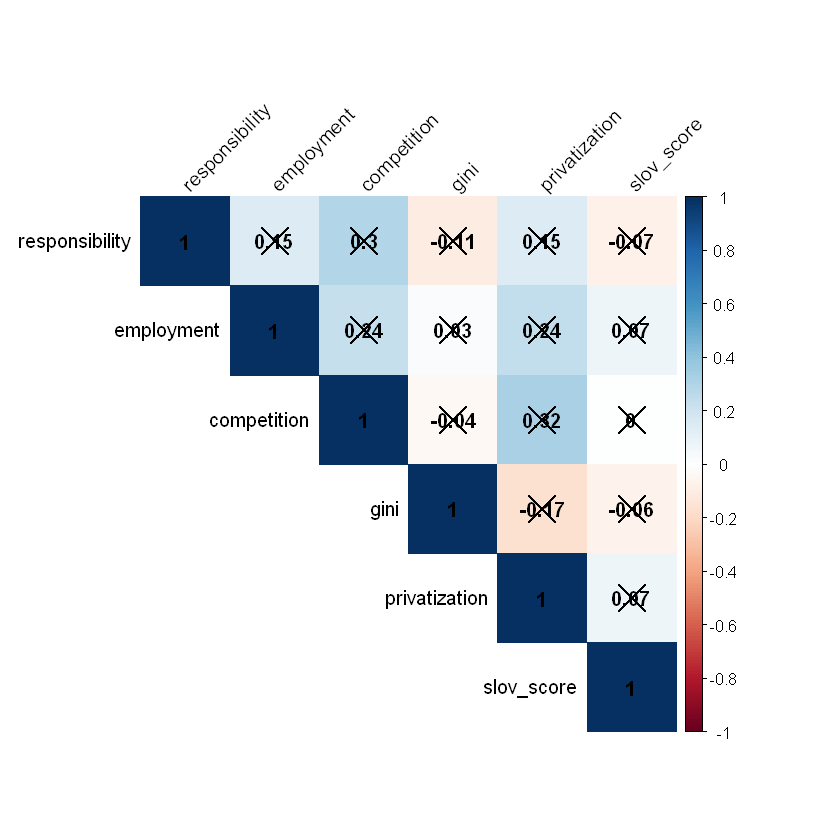

In [18]:
# Spearman rank correlation
library(corrplot)

cor_data <- data_all[, c("responsibility", "employment", "competition", "gini","privatization", "slov_score")]

cor_matrix <- cor(cor_data, method = 'spearman')

cor_matrix_pv <- cor.mtest(cor_matrix, conf.level = 0.95)
corrplot(cor_matrix, p.mat = cor_matrix_pv$p, method = "color", type = "upper", 
         tl.col = "black", tl.srt = 45, addCoef.col = "black")

In addition, we analyzed the Spearman rank correlation matrix to determine the extent to which the statement variables were associated with the outcome variable, i.e., the Slovenian score. However, the results show that the statement variables that we initially considered for predicting the Slovenian score are not significantly correlated, indicating that there is no linear relationship between them. As a consequence, this finding has implications for further developing the model. Specifically, this suggests that non-linear modeling techniques like decision trees or random forests might be more appropriate to use. Alternatively, we could explore the possibility of adding new variables that might help explain the prediction score of selecting Slovenia.

### Relationship between grade groups and statements

After examining the Spearman rank correlation matrix, we decided to investigate whether there is a connection between student groups based on their exam scores and their responses to different macroeconomic statements. To ensure that the groups were comparable in size, we combined our initial six grade groups into four. This allowed us to perform a more robust analysis on the association between the student groups and their responses. Furthemore, we first used chi-square test to determine whether there is a significant association between two categorical variables. 

In [19]:
# joining grups based on grades

unique(data_all$grades) # unordered

data_all$grades_joint <- data_all$grades
    data_all$grades_joint <- car::recode(data_all$grades_joint, "'I did not take an exam' = 'No Recall'; 'up to 15' = 'Low Scores'; 'from 21 to 25' = 'Moderate Scores'; 'from 26 to 30' = 'High Scores'")
    data_all$grades_joint[data_all$grades_joint == 'I do not remember'] <- 'No Recall'
    data_all$grades_joint[data_all$grades_joint == 'from 16 to 20'] <- 'Low Scores'
    data_all$grades_joint[data_all$grades_joint == '31 or more'] <- 'High Scores'
    data_all$grades_joint <- factor(data_all$grades_joint, levels = c('No Recall', 'Low Scores', 'Moderate Scores', 'High Scores'))
table(data_all$grades_joint)

[1] "I do not remember"      "31 or more"             "from 21 to 25"         
[4] "from 16 to 20"          "up to 15"               "I did not take an exam"
[7] "from 26 to 30"


      No Recall      Low Scores Moderate Scores     High Scores 
             43              62              81              50 

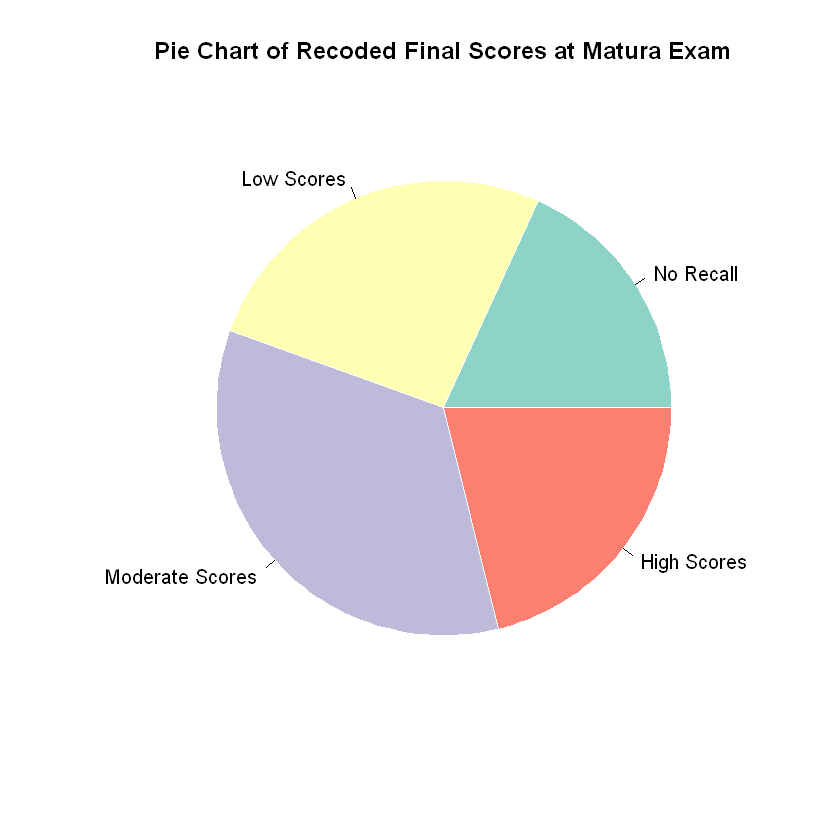

In [44]:
pajek <- table(data_all$grades_joint)
pie(pajek,  labels = names(pajek), main="Pie Chart of Recoded Final Scores at Matura Exam", 
    col = myPalette, border = "white")

In [20]:
# check for chi-square > p-values are high > fail to reject null hypothesis
library(broom)

chi_tests <- list(
    chisq.test(table(data_all$grades_joint, data_all$responsibility)),
    chisq.test(table(data_all$grades_joint, data_all$employment)),
    chisq.test(table(data_all$grades_joint, data_all$competition)),
    chisq.test(table(data_all$grades_joint, data_all$gini)),
    chisq.test(table(data_all$grades_joint, data_all$privatization))
)

results <- data.frame(
  Variable = c("responsibility", "employment", "competition", "gini", "privatization"),
  P_value = round(sapply(chi_tests, function(x) x$p.value), 3)
)

print(results)

Warning message in chisq.test(table(data_all$grades_joint, data_all$responsibility)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$employment)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$competition)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$gini)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$privatization)):
"Chi-squared approximation may be incorrect"


        Variable P_value
1 responsibility   0.062
2     employment   0.757
3    competition   0.550
4           gini   0.524
5  privatization   0.176


In [21]:
# Chi-square test
library(broom)

tests <- list(
  chisq.test(table(data_all$grades_joint, data_all$responsibility)),
  chisq.test(table(data_all$grades_joint, data_all$employment)),
  chisq.test(table(data_all$grades_joint, data_all$competition)),
  chisq.test(table(data_all$grades_joint, data_all$gini)),
  chisq.test(table(data_all$grades_joint, data_all$privatization))
)

results <- data.frame(
  Variable = c("responsibility", "employment", "competition", "gini", "privatization"),
  P_value = sapply(tests, function(x) x$p.value)
)

print(results)

Warning message in chisq.test(table(data_all$grades_joint, data_all$responsibility)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$employment)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$competition)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$gini)):
"Chi-squared approximation may be incorrect"
Warning message in chisq.test(table(data_all$grades_joint, data_all$privatization)):
"Chi-squared approximation may be incorrect"


        Variable    P_value
1 responsibility 0.06235585
2     employment 0.75725560
3    competition 0.54996163
4           gini 0.52395044
5  privatization 0.17563805


The chi-square test in most of the statements is not significant at 5 % level, meaning that there is not evidence to conclude that there is a significant association between the two categorical variables. This suggests that these statements may not be useful predictors of student performance on exams or their attitudes towards macroeconomic concepts. However, the p-value for the chi-square test of the statement measuring responsibility appears to be very close to the limit of acceptance level (p = 0.06), meaning that test result is borderline significant. In other words, this suggest that there may be a weak association between student groups and their responses to the statements measuring responsibility, but it is not strong enough to be considered statistically significant at a significant level of 0.05.

Moreoever, we investigated the differences in the medians of the responses to the statements across different grade groups, using Kruskal-Wallis rank sum test and potted the groups using violin plot.

In [22]:
# Kruskal-Wallis test

tests <- list(
  kruskal.test(data_all$responsibility ~ data_all$grades_joint),
  kruskal.test(data_all$employment ~ data_all$grades_joint),
  kruskal.test(data_all$competition ~ data_all$grades_joint),
  kruskal.test(data_all$gini ~ data_all$grades_joint),
  kruskal.test(data_all$privatization ~ data_all$grades_joint)
)

results <- data.frame(
  Variable = c("responsibility", "employment", "competition", "gini", "privatization"),
  P_value = round(sapply(tests, function(x) x$p.value), 3)
)

print(results)


        Variable P_value
1 responsibility   0.069
2     employment   0.722
3    competition   0.914
4           gini   0.123
5  privatization   0.063


Using non-parametric Kruskal-Wallis test we aimed to determine if there is a significant difference in the medians of statement variables across the four groups reflecting the degree of success on final exam. Outputs from the kruskall-Wallis test in all cases is greater than .05, indicating that there is no sufficient evidence to reject null hypothesis. Therefore, we can conclude that the statement variables does not appear to be a strong predictor of the groups. However, statements regarding the responsibility and privatization, appear to be somewhat on the limit of the significance, indicating a potential difference of medians across groups. In order to gain additional insight into distribution of the data and any potential pattern, we created a violin plots of groups for each statement variable.

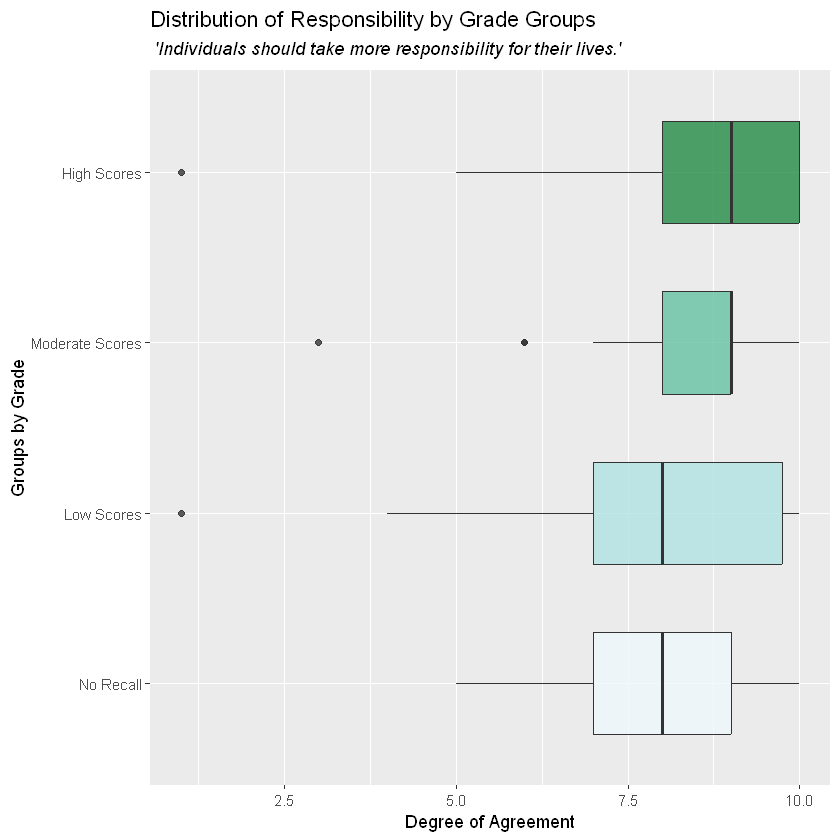

In [23]:
respon_box <- ggplot(data_all, aes(x = grades_joint, y = responsibility, fill = grades_joint)) + coord_flip() +
  geom_boxplot(width = 0.6, alpha = 0.8) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="BuGn") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Responsibility by Grade Groups", subtitle = expression(italic(" 'Individuals should take more responsibility for their lives.' "))) 
respon_box

Warning message:
"The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead."


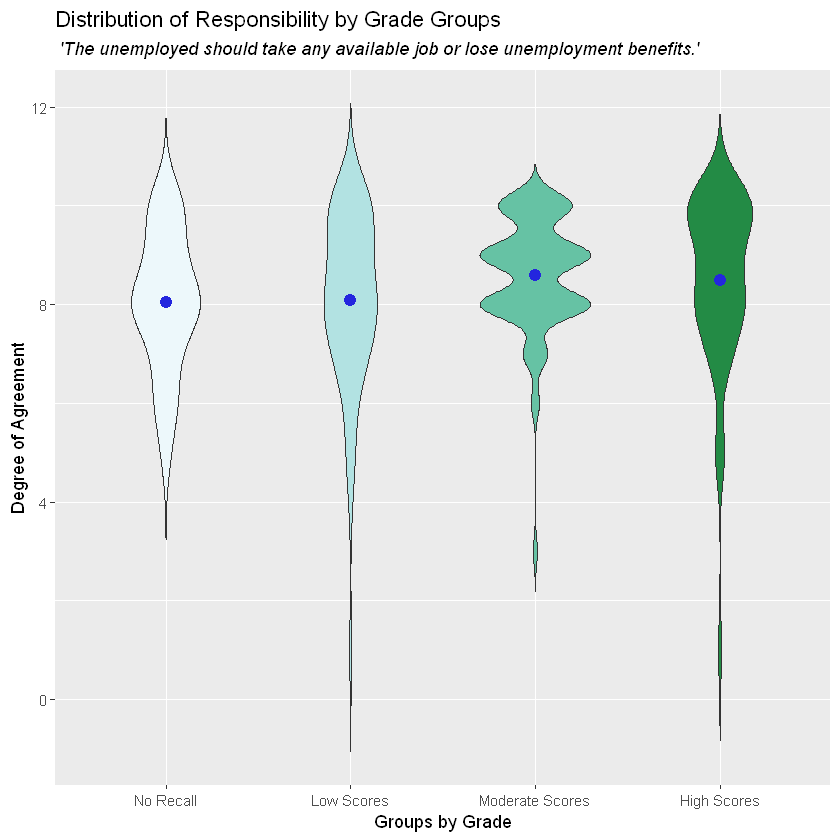

In [24]:
respon_box <- ggplot(data_all, aes(x = grades_joint, y=responsibility, fill = grades_joint)) +
  geom_violin(width = 0.6, alpha = 1, trim = FALSE) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="BuGn") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Responsibility by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
respon_box + stat_summary(fun.y = mean, geom = 'point', size = 3, color ='#2326de')

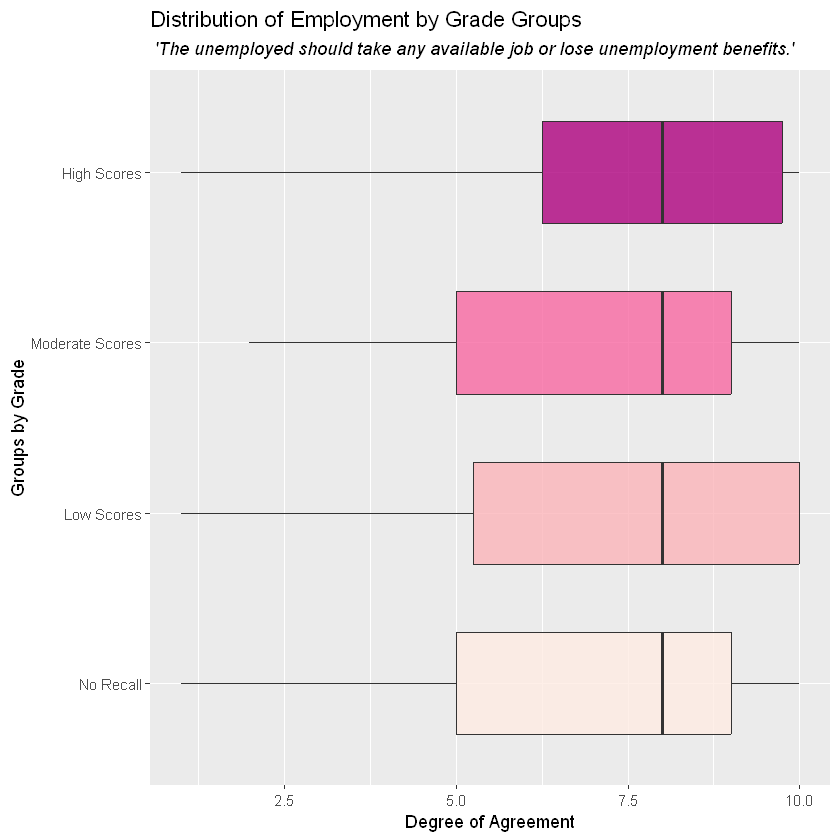

In [25]:
employ_box <- ggplot(data_all, aes(x = grades_joint, y=employment, fill = grades_joint)) + coord_flip() +
  geom_boxplot(width = 0.6, alpha = 0.8) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="RdPu") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Employment by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
employ_box

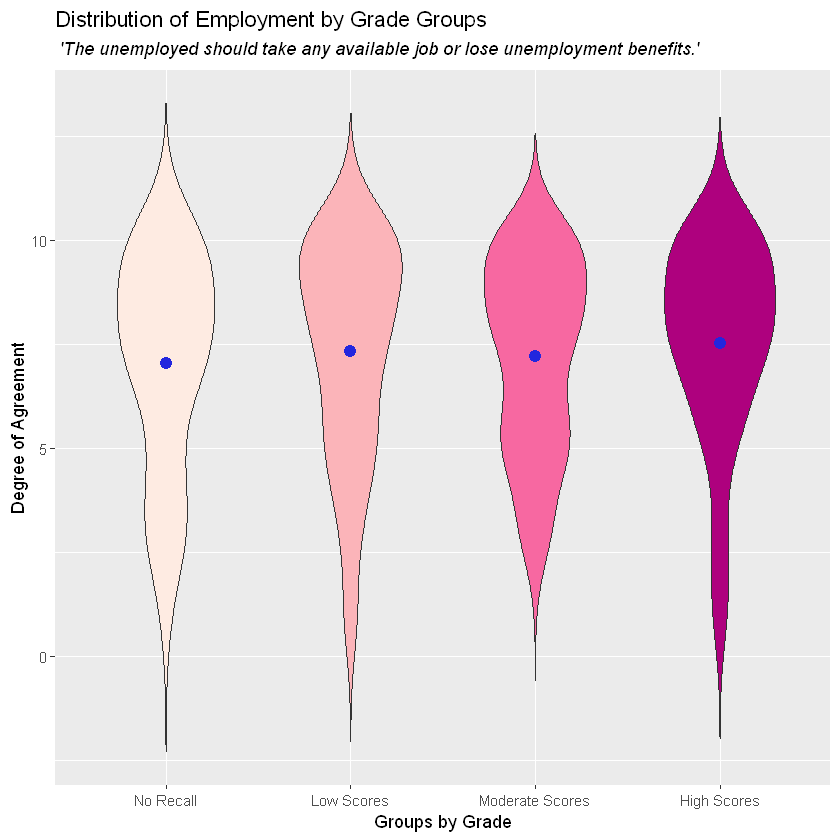

In [26]:
par(mfrow = c(1,2))
employ_box <- ggplot(data_all, aes(x = grades_joint, y=employment, fill = grades_joint)) +
  geom_violin(width = 0.6, alpha = 1, trim = FALSE) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="RdPu") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Employment by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
employ_box + stat_summary(fun.y = mean, geom = 'point', size = 3, color ='#2326de')

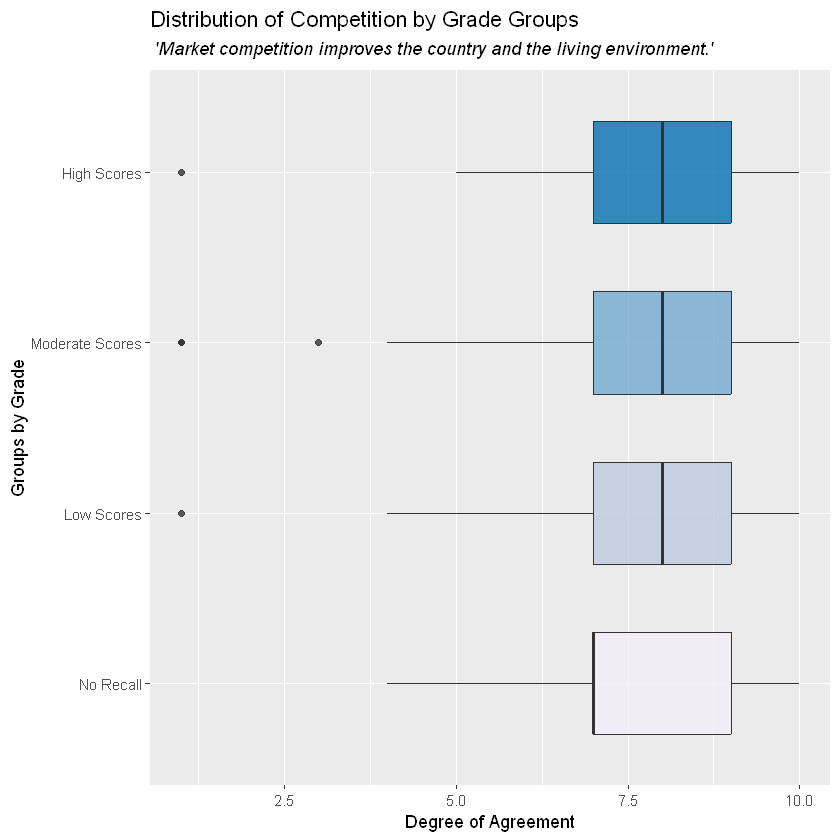

In [27]:
compet_box <- ggplot(data_all, aes(x = grades_joint, y = competition, fill = grades_joint)) + coord_flip() +
  geom_boxplot(width = 0.6, alpha = 0.8) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="PuBu") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Competition by Grade Groups", subtitle = expression(italic(" 'Market competition improves the country and the living environment.' "))) 
compet_box

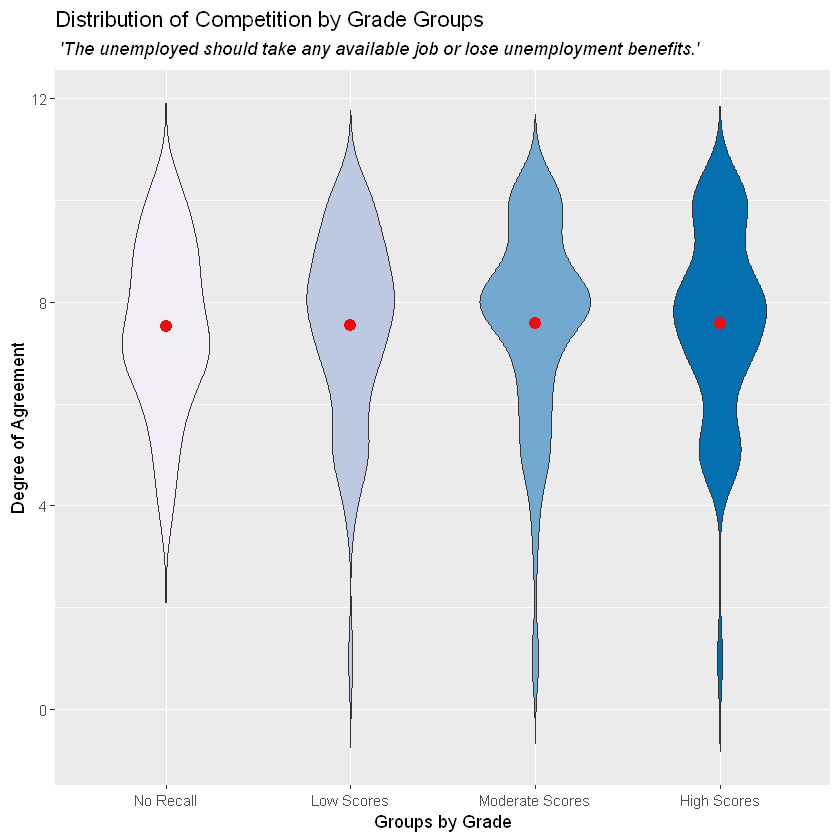

In [28]:

compet_box <- ggplot(data_all, aes(x = grades_joint, y=competition, fill = grades_joint)) +
  geom_violin(width = 0.6, alpha = 1, trim = FALSE) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="PuBu") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Competition by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
compet_box + stat_summary(fun.y = mean, geom = 'point', size = 3, color ='#f00c0c')

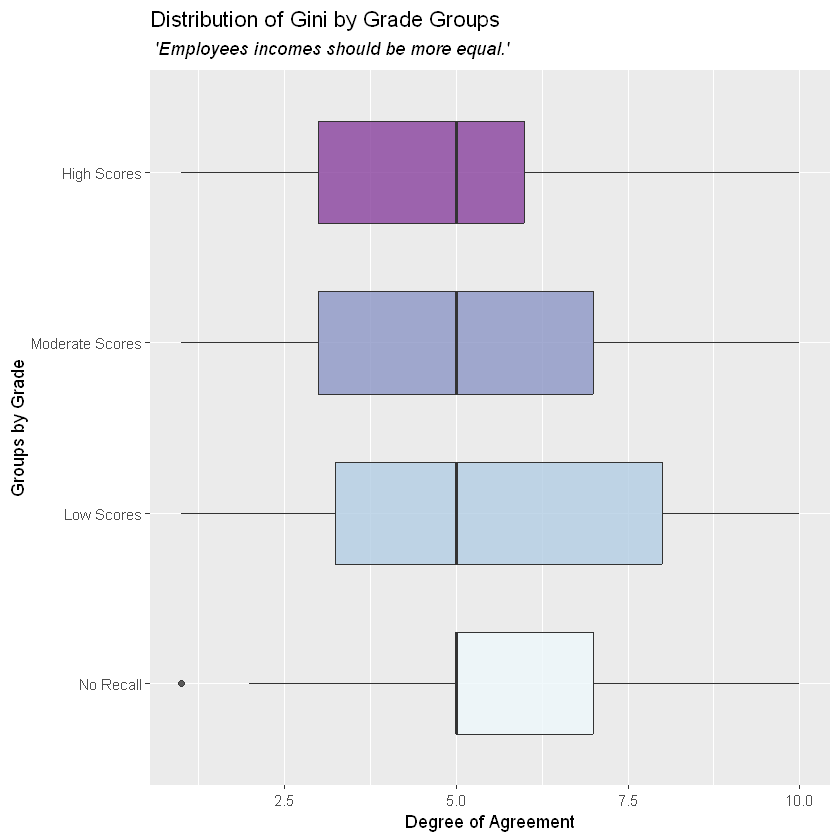

In [29]:
gini_box <- ggplot(data_all, aes(x = grades_joint, y = gini, fill = grades_joint)) + coord_flip() +
  geom_boxplot(width = 0.6, alpha = 0.8) + 
  theme(legend.position="none") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Gini by Grade Groups", subtitle = expression(italic(" 'Employees incomes should be more equal.' "))) +
  scale_fill_brewer(palette="BuPu") 
gini_box
# gini_box + theme_minimal()


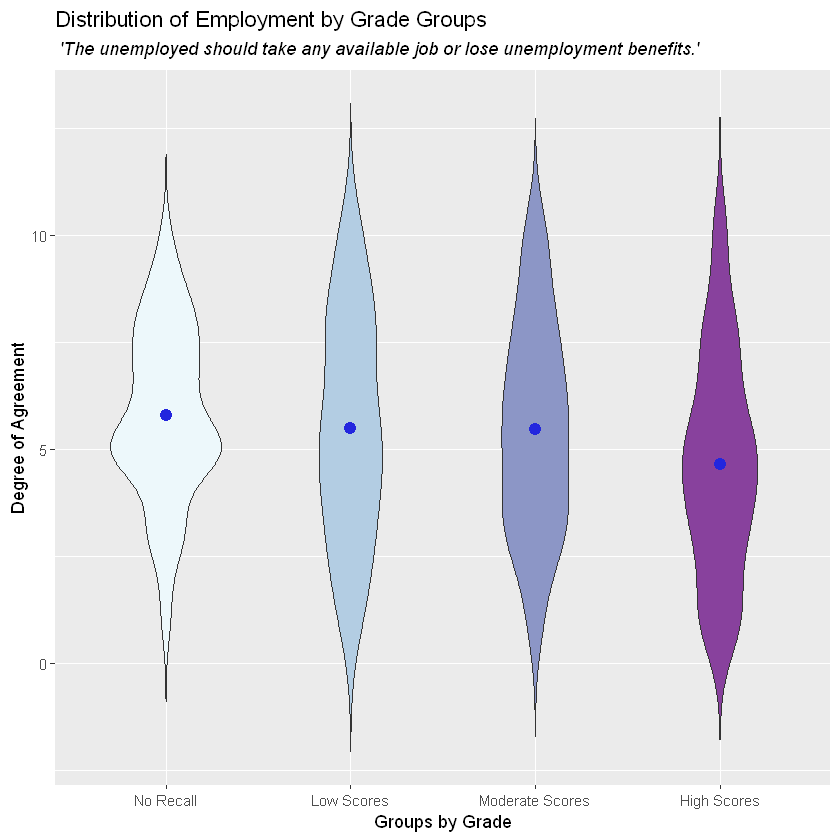

In [30]:
gini_box <- ggplot(data_all, aes(x = grades_joint, y=gini, fill = grades_joint)) +
  geom_violin(width = 0.6, alpha = 1, trim = FALSE) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="BuPu") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Employment by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
gini_box + stat_summary(fun.y = mean, geom = 'point', size = 3, color ='#2326de')

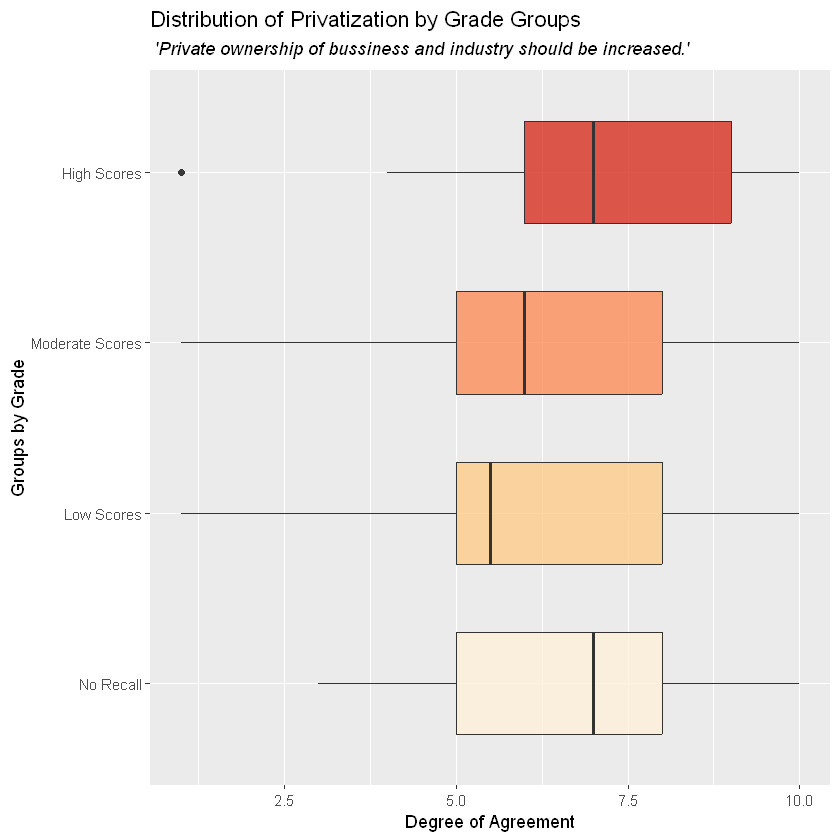

In [31]:
privat_box <- ggplot(data_all, aes(x = grades_joint, y = privatization, fill = grades_joint)) + coord_flip() +
  geom_boxplot(width = 0.6, alpha = 0.8) + 
  theme(legend.position="none") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Privatization by Grade Groups", subtitle = expression(italic(" 'Private ownership of bussiness and industry should be increased.' "))) +
  scale_fill_brewer(palette="OrRd") 
privat_box

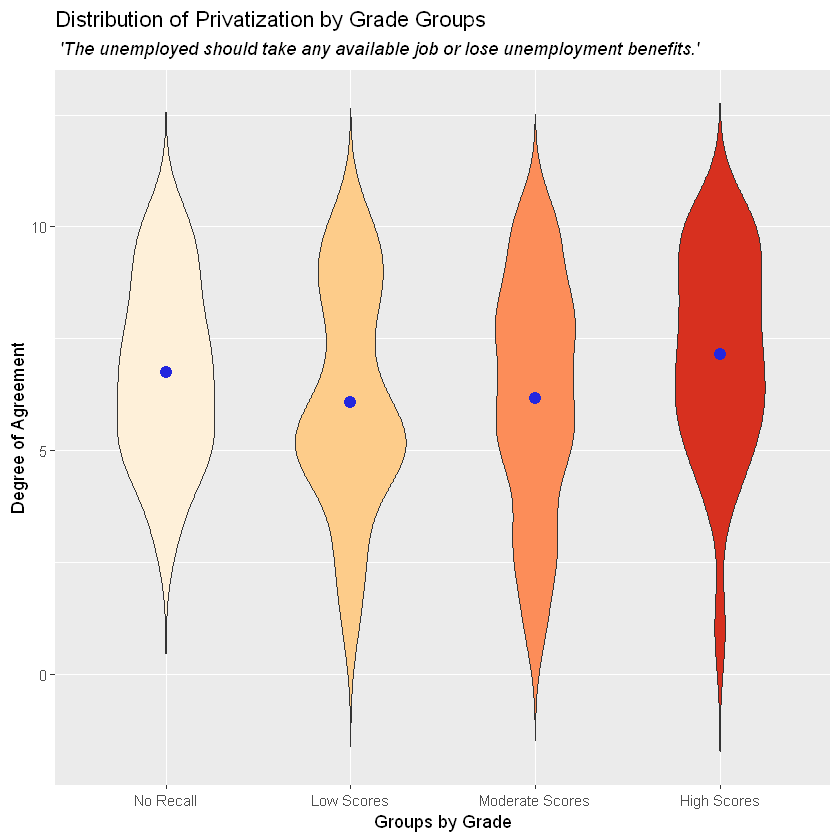

In [32]:
privat_box <- ggplot(data_all, aes(x = grades_joint, y=privatization, fill = grades_joint)) +
  geom_violin(width = 0.6, alpha = 1, trim = FALSE) + 
  theme(legend.position="none") +
  scale_fill_brewer(palette="OrRd") +
  labs(x = "Groups by Grade", y = "Degree of Agreement") +
  ggtitle("Distribution of Privatization by Grade Groups", subtitle = expression(italic(" 'The unemployed should take any available job or lose unemployment benefits.' "))) 
privat_box + stat_summary(fun.y = mean, geom = 'point', size = 3, color ='#2326de')

In terms of violin plots interpretation, we will provide more detailed analysis of two violin plots that displayed only marginally significant results. When examining the violin plot for the responsibility statement, we can observe that the medians for each group are similar, with most scores clustered around 8. The violins also suggest a skewed distribution for all groups, with more scores in the higher range than the lower range. Turning to the violin plot for the moderate scores, we see that the distribution is slightly narrower than the other three groups, suggesting less variability in scores. Finally,  the width of the violin is greatest around the agreement values of 8 for the first group, namely, no recall, while for the high score group, it is greatest around a value of 10.

Looking at the violin plot for the privatization statement, it becomes apparent that the median scores for the moderate and low score groups are lower by one unit than those of the no recall and high score groups, with median values around 7 and 6, respectively. Furthermore, the shape of the violins for the no recall and high score groups appear to be somewhat more tightly clustered towards the upper end of the y-axis compared to the other groups. The width of the low score group is greatest around a value of 5, while the distribution of the moderate score group is more even along the y-axis.

### Logistic regression model

In [33]:
data_all$slo_bi <- ifelse(data_all$slov_score >= 0.8, 1, 0)
head(data_all)

,id_i,timestamp,age,region,grades,responsibility,employment,competition,gini,privatization,slovenia_an_option,slovenia_selected,slov_score,grades_joint,slo_bi
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>
1,000f1445-945e-48da-9a6f-0cac103ca7a3,2023-01-12T08:16:21.233Z,0-25,Osrednjeslovenska,I do not remember,10,4,7,5,6,4,3,0.7500000,No Recall,0
2,002bc375-035c-4694-84d2-9c51746d8aa6,2023-01-10T13:04:10.750Z,0-25,Osrednjeslovenska,31 or more,10,7,5,5,6,2,2,1.0000000,High Scores,1
3,02d7448d-9dd2-4115-a512-d4f1a9761aa7,2023-01-11T09:11:57.043Z,0-25,Osrednjeslovenska,from 21 to 25,9,9,7,5,9,1,1,1.0000000,Moderate Scores,1
4,037498ef-663e-44c2-b628-bfd2eeb06861,2023-01-12T08:14:54.803Z,0-25,Podravska,from 16 to 20,9,8,9,7,6,2,2,1.0000000,Low Scores,1
5,04346d1e-81a7-43dc-9eb6-b745436aad8f,2023-01-10T13:05:29.078Z,0-25,Goriška,31 or more,9,10,7,7,7,3,2,0.6666667,High Scores,0
6,0450f190-731d-4c44-86b4-324fe1d93da2,2023-01-10T13:05:39.833Z,0-25,Osrednjeslovenska,I do not remember,8,10,6,4,7,2,2,1.0000000,No Recall,1


In [34]:
model <- glm(slo_bi ~ responsibility + employment + competition + gini + privatization, data = data_all, family = binomial(link = "logit"))
summary(model)


Call:
glm(formula = slo_bi ~ responsibility + employment + competition + 
    gini + privatization, family = binomial(link = "logit"), 
    data = data_all)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9199  -1.3646   0.8137   0.9187   1.2602  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)
(Intercept)     1.099134   1.001538   1.097    0.272
responsibility -0.119083   0.102980  -1.156    0.248
employment      0.022800   0.060493   0.377    0.706
competition     0.003183   0.088156   0.036    0.971
gini           -0.045539   0.058810  -0.774    0.439
privatization   0.100985   0.064255   1.572    0.116

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 300.89  on 235  degrees of freedom
Residual deviance: 295.29  on 230  degrees of freedom
AIC: 307.29

Number of Fisher Scoring iterations: 4


In [35]:
library(MASS)
stepAIC(model, method = "both")


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select




Start:  AIC=307.29
slo_bi ~ responsibility + employment + competition + gini + privatization

                 Df Deviance    AIC
- competition     1   295.29 305.29
- employment      1   295.43 305.43
- gini            1   295.89 305.89
- responsibility  1   296.67 306.67
<none>                295.29 307.29
- privatization   1   297.79 307.79

Step:  AIC=305.29
slo_bi ~ responsibility + employment + gini + privatization

                 Df Deviance    AIC
- employment      1   295.44 303.44
- gini            1   295.89 303.89
- responsibility  1   296.79 304.79
<none>                295.29 305.29
- privatization   1   298.09 306.09

Step:  AIC=303.44
slo_bi ~ responsibility + gini + privatization

                 Df Deviance    AIC
- gini            1   295.98 301.98
- responsibility  1   296.83 302.83
<none>                295.44 303.44
- privatization   1   298.77 304.77

Step:  AIC=301.98
slo_bi ~ responsibility + privatization

                 Df Deviance    AIC
- responsibilit


Call:  glm(formula = slo_bi ~ privatization, family = binomial(link = "logit"), 
    data = data_all)

Coefficients:
  (Intercept)  privatization  
  -0.00001919     0.10809996  

Degrees of Freedom: 235 Total (i.e. Null);  234 Residual
Null Deviance:	    300.9 
Residual Deviance: 297.4 	AIC: 301.4

In [36]:
data_all$gini_5 <- cut(data_all$gini, breaks = c(0, 2, 4, 6, 8, 10), labels = c("1", "2", "3", "4", "5"))
head(data_all)

,id_i,timestamp,age,region,grades,responsibility,employment,competition,gini,privatization,slovenia_an_option,slovenia_selected,slov_score,grades_joint,slo_bi,gini_5
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>,<fct>
1,000f1445-945e-48da-9a6f-0cac103ca7a3,2023-01-12T08:16:21.233Z,0-25,Osrednjeslovenska,I do not remember,10,4,7,5,6,4,3,0.7500000,No Recall,0,3
2,002bc375-035c-4694-84d2-9c51746d8aa6,2023-01-10T13:04:10.750Z,0-25,Osrednjeslovenska,31 or more,10,7,5,5,6,2,2,1.0000000,High Scores,1,3
3,02d7448d-9dd2-4115-a512-d4f1a9761aa7,2023-01-11T09:11:57.043Z,0-25,Osrednjeslovenska,from 21 to 25,9,9,7,5,9,1,1,1.0000000,Moderate Scores,1,3
4,037498ef-663e-44c2-b628-bfd2eeb06861,2023-01-12T08:14:54.803Z,0-25,Podravska,from 16 to 20,9,8,9,7,6,2,2,1.0000000,Low Scores,1,4
5,04346d1e-81a7-43dc-9eb6-b745436aad8f,2023-01-10T13:05:29.078Z,0-25,Goriška,31 or more,9,10,7,7,7,3,2,0.6666667,High Scores,0,4
6,0450f190-731d-4c44-86b4-324fe1d93da2,2023-01-10T13:05:39.833Z,0-25,Osrednjeslovenska,I do not remember,8,10,6,4,7,2,2,1.0000000,No Recall,1,2


### Bar Plot of Ranking Scores of Countries 
*for the sake of internship*

In [37]:
data_rank <- read.csv('out_corrected.csv', header = TRUE)

data_rank$country <- ifelse(data_rank$country == 'Macedonia, Republic of', 'North Macedonia', data_rank$country)
head(data_rank)

,country,ranking.score
,<chr>,<dbl>
1,Slovenia,0.8013699
2,Switzerland,0.7897574
3,Netherlands,0.7748619
4,Austria,0.7468531
5,Germany,0.7374302
6,Sweden,0.7208054


Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


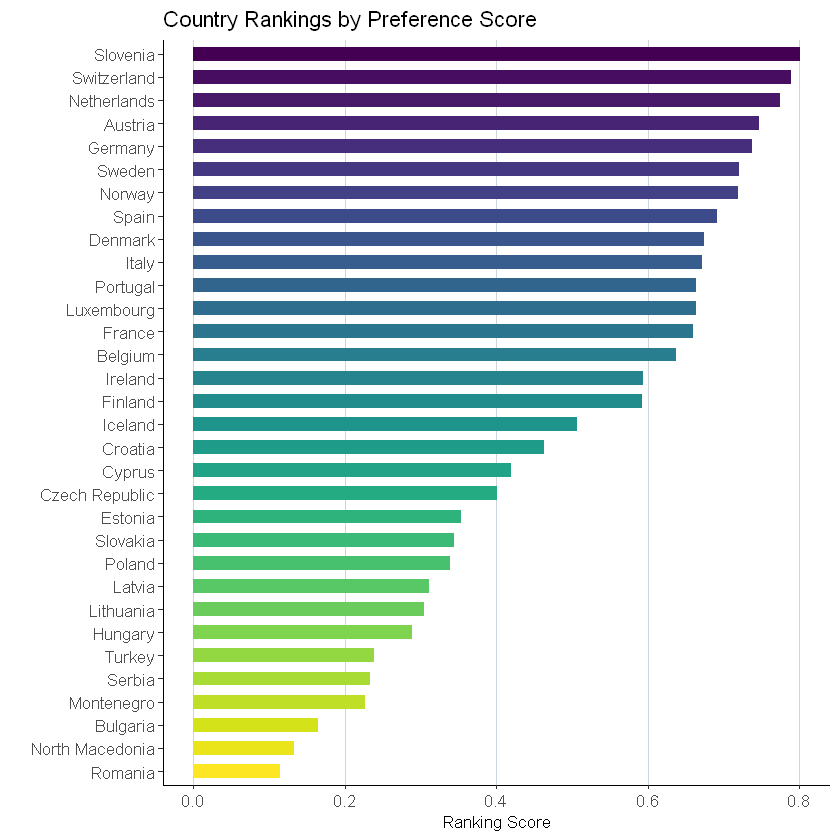

In [38]:
data_rank %>%
  mutate(country = fct_reorder(country, ranking.score)) %>%
  ggplot(aes(x = country, y = ranking.score, fill = country,)) +
    geom_bar(stat="identity", alpha=1, width=0.6) +
    coord_flip() +
    theme_classic() +
    theme(legend.position="none",
          axis.title.x = element_text(size = 10),
          axis.text.x = element_text(size = 10),
          axis.text.y = element_text(size = 10),
          panel.grid.major.x = element_line(color = "#cdd6dc", size = 0.3)) +
    xlab(" ") + ylab("Ranking Score") +
    scale_fill_manual(values = rev(viridis(length(data_rank$country)))) +
    ggtitle("Country Rankings by Preference Score")